In [16]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import os


In [2]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
data = data.drop(columns='Id')
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
print(data.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


Axes(0.125,0.11;0.775x0.77)


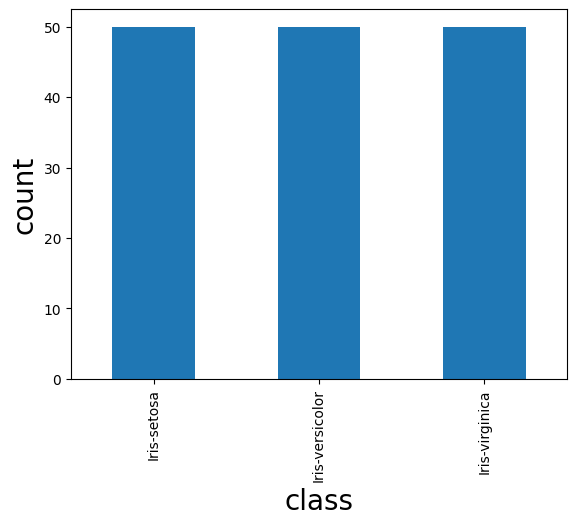

In [14]:
bar_graph = data['Species'].value_counts().plot.bar("flower distribution")
bar_graph.set_xlabel('class',size=20)
bar_graph.set_ylabel('count',size=20)
print(bar_graph)

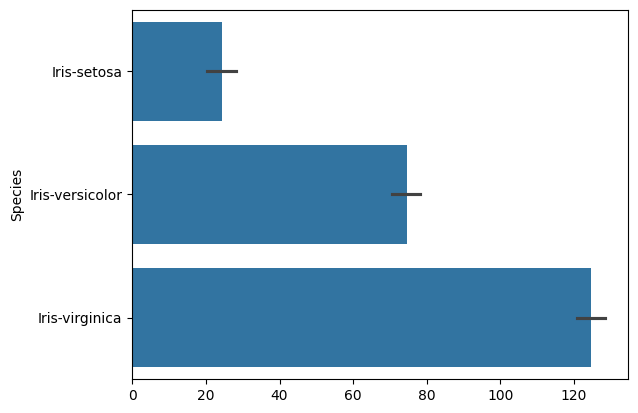

In [21]:
plot = sns.barplot(data['Species'])


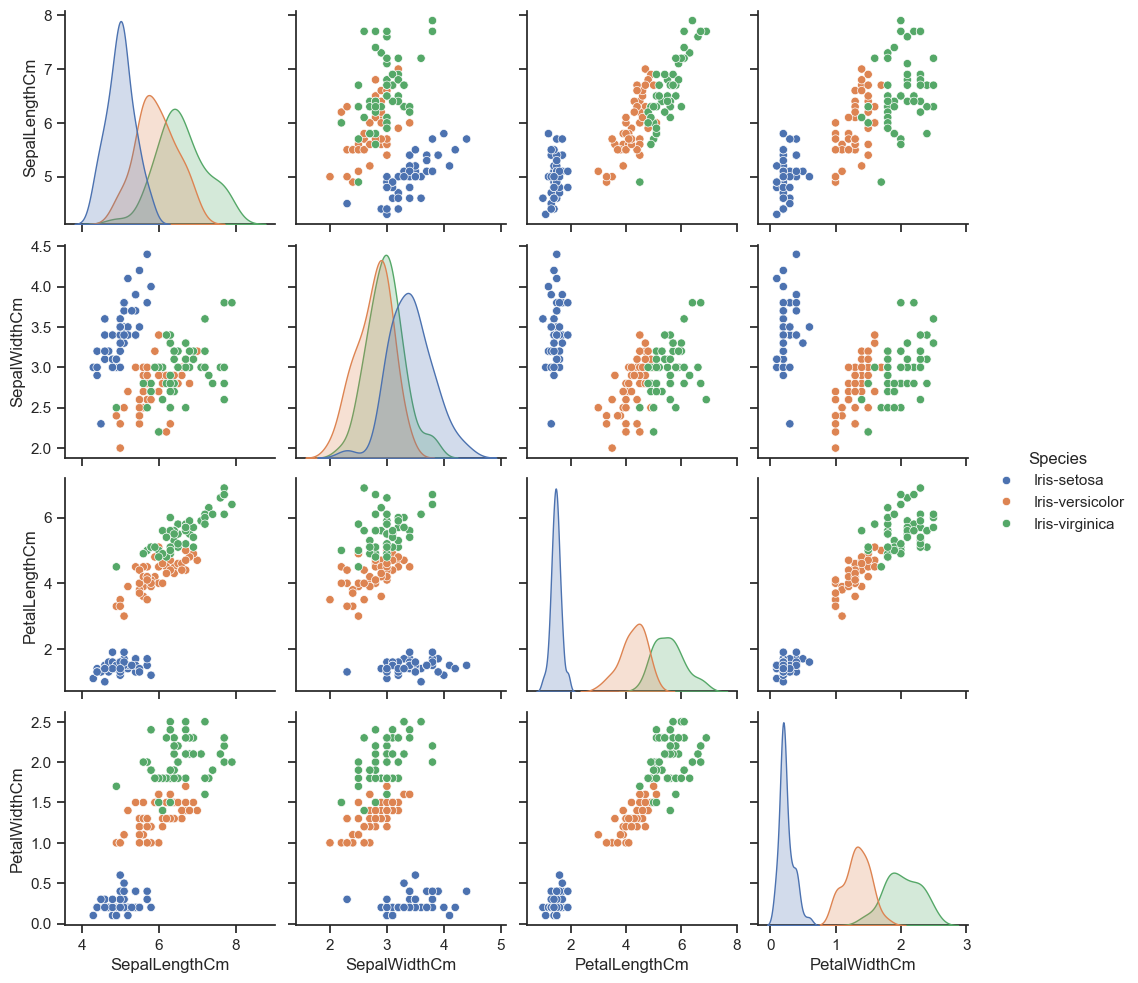

In [22]:
sns.set(style="ticks")
sns.pairplot(data, hue="Species")

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [29]:
X = data.drop(['Species'], axis=1)
y = data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [30]:
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (120, 4)
Shape of testing feature: (30, 4)
Shape of training label: (120,)
Shape of training label: (30,)


In [ ]:
from sklearn import metrics

def evaluateModel(model, X_test, y_test):
    y_pred = model.predict(X_test)

    
    acc = metrics.accuracy_score(y_test, y_pred)

   
    prec = metrics.precision_score(y_test, y_pred, average='weighted')
    rec = metrics.recall_score(y_test, y_pred, average='weighted')
    f1 = metrics.f1_score(y_test, y_pred, average='weighted')
    
    
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa}


In [50]:
from sklearn import tree

decision_tree_classifier = tree.DecisionTreeClassifier(random_state=1)
model = decision_tree_classifier.fit(X_train, y_train)

decision_tree_eval = evaluateModel(decision_tree_classifier, X_test, y_test)


print('Accuracy:', decision_tree_eval['acc'])
print('Precision:', decision_tree_eval['prec'])
print('Recall:', decision_tree_eval['rec'])
print('F1 Score:', decision_tree_eval['f1'])
print('Cohen Kappa:', decision_tree_eval['kappa'])




Accuracy: 0.9
Precision: 0.9025252525252525
Recall: 0.9
F1 Score: 0.9
Cohen Kappa: 0.8466780238500852


In [57]:
predict = [[5.1, 3.5, 1.4, 0.2]]

"""
'SepalLengthCm' : 5.1,
    'SepalWidthCm':  3.5,
    'PetalLengthCm': 1.4,
    'PetalWidthCm':  0.2

"""
    
   
ans = model.predict(predict)

print(ans)
    



['Iris-setosa']


c:\Users\aayus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
